# 最小化函数

## minimize 函数

In [1]:
import matplotlib.pyplot as plt
import numpy as np

已知斜抛运动的水平飞行距离公式：

$d = 2 \frac{v_0^2}{g} \sin(\theta) \cos (\theta)$

- $d$ 水平飞行距离
- $v_0$ 初速度大小
- $g$ 重力加速度
- $\theta$ 抛出角度

希望找到使 $d$ 最大的角度 $\theta$。

定义距离函数：

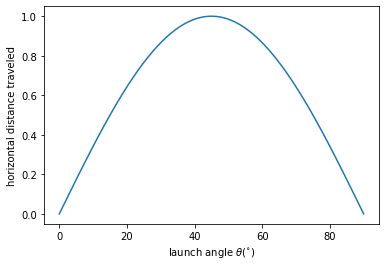

In [7]:
def dist(theta, v0):
    """calculate the distance travelled by a projectile launched
    at theta degrees with v0 (m/s) initial velocity.
    """
    g = 9.8
    theta_rad = np.pi * theta / 180
    return 2 * v0**2 * np.sin(theta_rad) * np.cos(theta_rad)

theta = np.linspace(0,90,90)
plt.plot(theta, dist(theta,1.))
x1 = plt.xlabel(r'launch angle $\theta (^{\circ})$')
y1 = plt.ylabel('horizontal distance traveled')

因为 `Scipy` 提供的是最小化方法，所以最大化距离就相当于最小化距离的负数：

In [8]:
def neg_dist(theta, v0):
    return -1 * dist(theta, v0)

导入 `scipy.optimize.minimize`：

In [10]:
from scipy.optimize import minimize
result = minimize(neg_dist, 40, args=(1,))
print('optmal angle = {:.1f} degrees'.format(result.x[0]))

optmal angle = 45.0 degrees


`minimize` 接受三个参数：第一个是要优化的函数，第二个是初始猜测值，第三个则是优化函数的附加参数，默认 `minimize` 将优化函数的第一个参数作为优化变量，所以第三个参数输入的附加参数从优化函数的第二个参数开始。

查看返回结果：

In [11]:
print(result)

      fun: -0.9999999967055745
 hess_inv: array([[823.17882298]])
      jac: array([2.83867121e-06])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([45.0023254])


## Rosenbrock 函数

Rosenbrock 函数是一个用来测试优化函数效果的一个非凸函数：

$f(x)=\sum\limits_{i=1}^{N-1}{100\left(x_{i+1}^2 - x_i\right) ^2 + \left(1-x_{i}\right)^2 }$

导入该函数：

In [12]:
from scipy.optimize import rosen
from mpl_toolkits.mplot3d import Axes3D

使用 `N = 2` 的 Rosenbrock 函数：

In [13]:
x, y = np.meshgrid(np.linspace(-2,2,25), np.linspace(-0.5,3.5,25))
z = rosen([x,y])

图像和最低点 `(1,1)`：

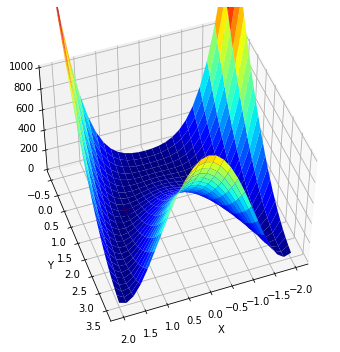

In [42]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.azim = 70; ax.elev = 48
ax.set_xlabel('X'); ax.set_ylabel('Y')
ax.set_zlim((0,1000))
p = ax.plot_surface(x,y,z, rstride=1, cstride=1, cmap=plt.cm.jet)
rosen_min = ax.plot([1],[1],[0],'ro', markersize='10')

传入初始值：

In [44]:
x0 = [1.3, 1.6, -0.5, -1.8, 0.8]
result = minimize(rosen, x0)
print(result.x)

[-0.96205044  0.93573839  0.88071185  0.77787448  0.60508856]


随机给定初始值：

In [48]:
x0 = np.random.randn(10)
result = minimize(rosen, x0)
print(x0)
print(result.x)

[ 0.32987087  0.92479026  1.33359707 -0.314921    0.65901163  1.33212818
 -0.09937311  0.51084418 -0.69177729 -1.1811416 ]
[0.99999995 0.99999992 0.99999986 0.99999976 0.99999955 0.99999914
 0.99999832 0.99999666 0.99999334 0.99998666]


对于 `N > 3`，函数的最小值为 $(x_1,x_2, ..., x_N) = (1,1,...,1)$，不过有一个局部极小值点 $(x_1,x_2, ..., x_N) = (-1,1,...,1)$，所以随机初始值如果选的不好的话，有可能返回的结果是局部极小值点：

## 优化方法

### BFGS 算法

`minimize` 函数默认根据问题是否有界或者有约束，使用 `'BFGS', 'L-BFGS-B', 'SLSQP'` 中的一种。

可以查看帮助来得到更多的信息：

In [51]:
np.info(minimize)

 minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None,
          bounds=None, constraints=(), tol=None, callback=None, options=None)

Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is an 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where 'n' is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <optimize.minimize-powell>`
        - 'CG'          :ref:`(see 

默认没有约束时，使用的是 [BFGS 方法](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)。

利用 `callback` 参数查看迭代的历史：

In [52]:
x0 = [-1.5, 4.5]
xi = [x0]
result = minimize(rosen, x0, callback=xi.append)
xi = np.asarray(xi)
print(xi.shape)
print(result.x)
print('in {} function evaluations.'.format(result.nfev))

(48, 2)
[0.99999554 0.99999107]
in 189 function evaluations.


绘图显示轨迹：